<a href="https://colab.research.google.com/github/Chen-Tsai-Hsuan/UPAS-classifier/blob/main/submission_DataFrame%E9%87%87%E7%92%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# 1. 讀取資料集
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test (1).csv')

# 2. 分離特徵與目標欄位
X = train_df.drop(columns=["ID", "target"])
y = train_df["target"]
X_test = test_df.drop(columns=["ID"])

# 3. 處理遺失值（以眾數填補）
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)

# 4. 切分訓練/驗證集
X_train, X_valid, y_train, y_valid = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 5. 建立與訓練模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. 模型評估
y_pred = model.predict(X_valid)
print("=== Classification Report ===")
print(classification_report(y_valid, y_pred))

# 7. 測試集預測
test_pred = model.predict(X_test_imputed)

# 8. 建立上傳結果
submission_df = pd.DataFrame({
    "ID": test_df["ID"],
    "target": test_pred
})

# 9. 輸出成 CSV（可上傳）
submission_df.to_csv("submission.csv", index=False)
print("submission.csv 檔案已建立")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     34935
           1       0.50      0.17      0.26      5654

    accuracy                           0.86     40589
   macro avg       0.69      0.57      0.59     40589
weighted avg       0.83      0.86      0.83     40589

submission.csv 檔案已建立


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# 若在 Notebook 執行才加這行（在 .py 檔中請移除）
# !pip install imbalanced-learn xgboost

from imblearn.over_sampling import SMOTE
import xgboost as xgb

# === 1. 讀取資料 ===
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test (1).csv")

# === 2. 分離特徵與標籤 ===
X = train_df.drop(columns=["ID", "target"])
y = train_df["target"]
X_test = test_df.drop(columns=["ID"])

# === 3. 處理遺失值 ===
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)

# === 4. 切分訓練/驗證資料集 ===
X_train, X_valid, y_train, y_valid = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# === 5. SMOTE 處理不平衡資料 ===
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# === 6. 建立 XGBoost 模型 ===
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# === 7. 模型評估 ===
y_pred_xgb = xgb_model.predict(X_valid)
print("\n=== XGBoost Classification Report ===")
print(classification_report(y_valid, y_pred_xgb))

# === 8. 預測測試集 ===
test_pred_xgb = xgb_model.predict(X_test_imputed)

# === 9. 輸出結果 ===
submission_df = pd.DataFrame({
    "ID": test_df["ID"],
    "target": test_pred_xgb
})
submission_df.to_csv("submission_xgb.csv", index=False)
print("✅ 已產出 submission_xgb.csv 檔案！")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:01:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     34935
           1       0.29      0.66      0.40      5654

    accuracy                           0.73     40589
   macro avg       0.61      0.70      0.61     40589
weighted avg       0.84      0.73      0.76     40589

✅ 已產出 submission_xgb.csv 檔案！


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:05:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     34935
           1       0.29      0.66      0.40      5654

    accuracy                           0.73     40589
   macro avg       0.61      0.70      0.61     40589
weighted avg       0.84      0.73      0.76     40589

✅ 已產出 submission_xgb.csv 檔案！


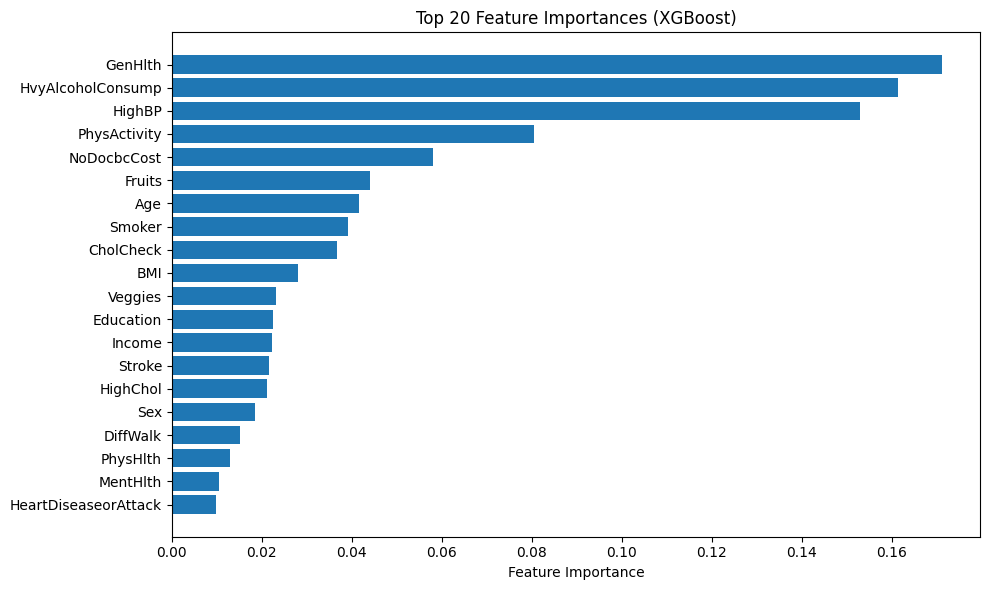

In [6]:
# 在 Colab 環境中安裝必要套件
!pip install -q imbalanced-learn xgboost

# 匯入函式庫
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt

# === 1. 讀取資料（記得先上傳 train (1).csv 和 test (1).csv 到 Colab）===
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test (1).csv")

# === 2. 分離特徵與標籤 ===
X = train_df.drop(columns=["ID", "target"])
y = train_df["target"]
X_test = test_df.drop(columns=["ID"])

# === 3. 處理遺失值 ===
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)

# === 4. 切分訓練/驗證資料集 ===
X_train, X_valid, y_train, y_valid = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# === 5. 使用 SMOTE 平衡訓練資料 ===
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# === 6. 訓練 XGBoost 模型 ===
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# === 7. 驗證模型效能 ===
y_pred_xgb = xgb_model.predict(X_valid)
print("\n=== XGBoost Classification Report ===")
print(classification_report(y_valid, y_pred_xgb))

# === 8. 測試集預測並輸出檔案 ===
test_pred_xgb = xgb_model.predict(X_test_imputed)
submission_df = pd.DataFrame({
    "ID": test_df["ID"],
    "target": test_pred_xgb
})
submission_df.to_csv("submission_xgb.csv", index=False)
print("✅ 已產出 submission_xgb.csv 檔案！")

# === 9. 特徵重要性分析圖 ===
feature_names = X.columns.tolist()
importance_scores = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance_scores
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:20][::-1], importance_df["Importance"][:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


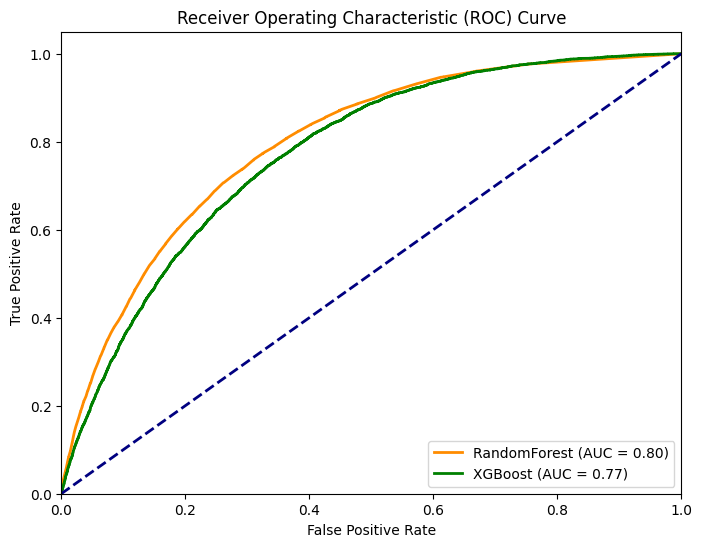


=== RandomForest Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     34935
           1       0.50      0.17      0.26      5654

    accuracy                           0.86     40589
   macro avg       0.69      0.57      0.59     40589
weighted avg       0.83      0.86      0.83     40589


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     34935
           1       0.29      0.66      0.40      5654

    accuracy                           0.73     40589
   macro avg       0.61      0.70      0.61     40589
weighted avg       0.84      0.73      0.76     40589



In [7]:
# prompt: 比較 Random Forest 和 XGBoost 的準確率與 ROC 曲線

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# === 比較 RandomForest 和 XGBoost 的 ROC 曲線 ===

# RandomForest 模型的預測機率
y_prob_rf = model.predict_proba(X_valid)[:, 1]

# XGBoost 模型的預測機率
y_prob_xgb = xgb_model.predict_proba(X_valid)[:, 1]

# 計算 RandomForest 的 ROC 曲線
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 計算 XGBoost 的 ROC 曲線
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_valid, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='RandomForest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 輸出準確率（Classification Report 已包含）
print("\n=== RandomForest Classification Report ===")
print(classification_report(y_valid, y_pred))

print("\n=== XGBoost Classification Report ===")
print(classification_report(y_valid, y_pred_xgb))


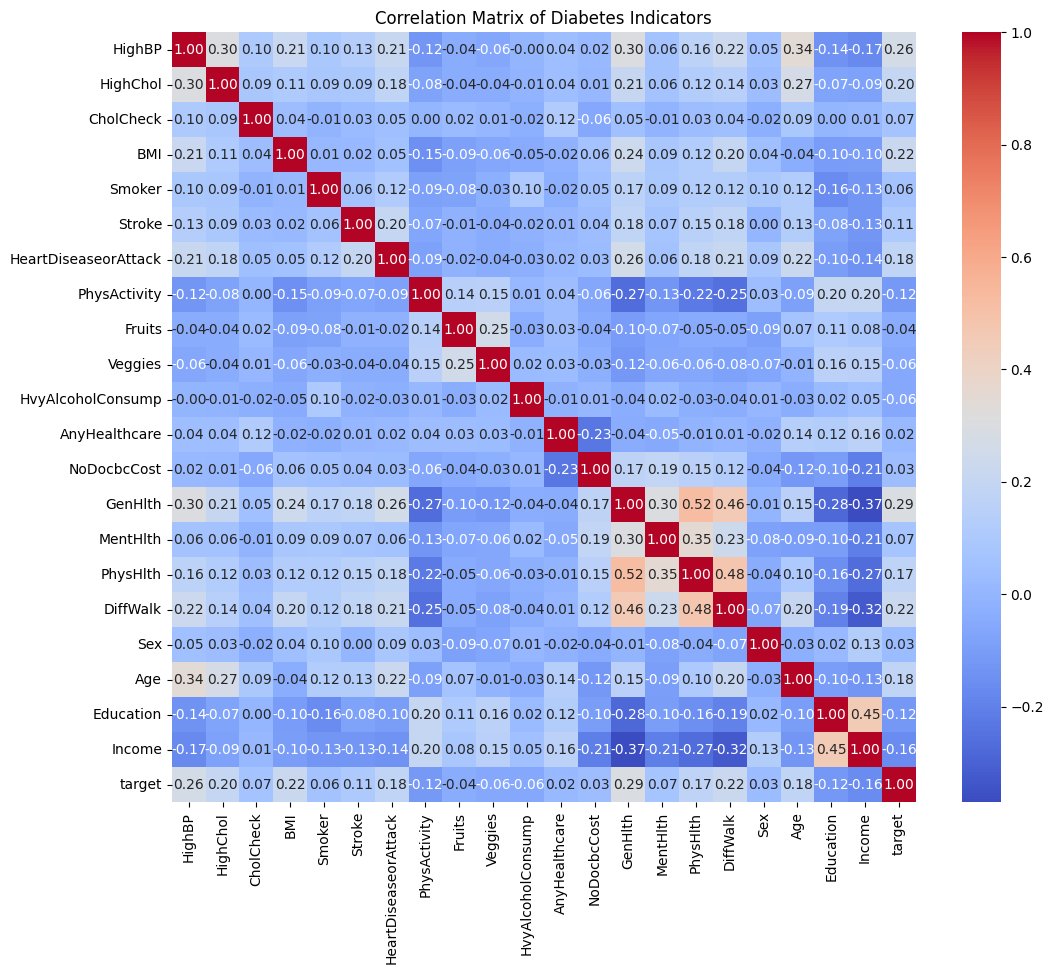

In [10]:
# prompt: 請幫我產生關連模型，指出在這些指標中，造成糖尿病原因的關聯性，並產生矩陣圖

import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關性矩陣
correlation_matrix = train_df.drop(columns=["ID"]).corr()

# 繪製相關性熱力圖
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Diabetes Indicators")
plt.show()
